In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
# import seaborn as sns

dataset = pd.read_csv("../data/logfile-v6.csv", delimiter=";")
dataset.head()

,time,datacenter_id,datacenter_name,host_id,type,active,number_of_pes,available_pes,mips,available_mips,...,frequency_range,voltage_range,ram,available_ram,bw,available_bw,storage,available_storage,power_model,vms
0,300.01,2,Datacenter_1,0,host,True,2,0,6000,2387.365877,...,NaN,1.200-1.3375,4000,17.0,10000,9838.0,160000,159100.0,"105.0,112.0,118.0,125.0,131.0,137.0,147.0,153....","2,394.03460741333333,0.0,0.0:2,433.04793488,0...."
1,600.01,2,Datacenter_1,0,host,True,2,0,6000,2387.365877,...,NaN,1.200-1.3375,4000,17.0,10000,9838.0,160000,159100.0,"105.0,112.0,118.0,125.0,131.0,137.0,147.0,153....","2,394.03460741333333,0.0,0.0:2,433.04793488,0...."
2,900.01,2,Datacenter_1,0,host,True,2,0,6000,2387.365877,...,NaN,1.200-1.3375,4000,17.0,10000,9838.0,160000,159100.0,"105.0,112.0,118.0,125.0,131.0,137.0,147.0,153....","2,394.03460741333333,0.0,0.0:2,433.04793488,0...."
3,1200.01,2,Datacenter_1,0,host,True,2,0,6000,2387.365877,...,NaN,1.200-1.3375,4000,17.0,10000,9838.0,160000,159100.0,"105.0,112.0,118.0,125.0,131.0,137.0,147.0,153....","2,394.03460741333333,0.0,0.0:2,433.04793488,0...."
4,1500.01,2,Datacenter_1,0,host,True,2,0,6000,2387.365877,...,NaN,1.200-1.3375,4000,17.0,10000,9838.0,160000,159100.0,"105.0,112.0,118.0,125.0,131.0,137.0,147.0,153....","2,394.03460741333333,0.0,0.0:2,433.04793488,0...."


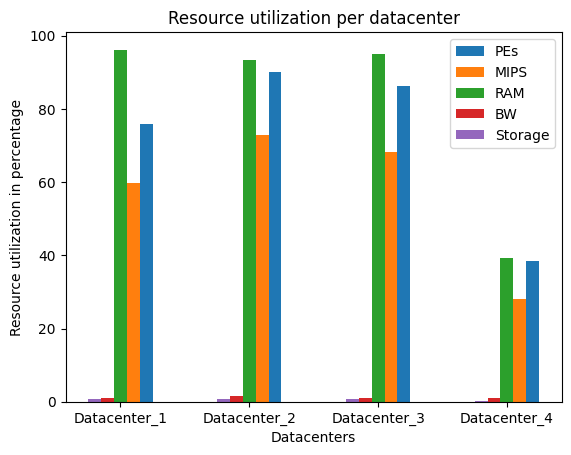

In [3]:
labels = np.unique(dataset['datacenter_name'])
datacenter_totalPEs = np.array([])
datacenter_availablePEs = np.array([])
datacenter_totalMIPS = np.array([])
datacenter_availableMIPS = np.array([])
datacenter_totalRAM = np.array([])
datacenter_availableRAM = np.array([])
datacenter_totalBW = np.array([])
datacenter_availableBW = np.array([])
datacenter_totalStorage = np.array([])
datacenter_availableStorage = np.array([])
for i in range(len(labels)):
    totalPEs = 0
    availablePEs = 0
    totalMIPS = 0
    availableMIPS = 0
    totalRAM = 0
    availableRAM = 0
    totalBW = 0
    availableBW = 0
    totalStorage = 0
    availableStorage = 0
    for index, sample in dataset[(dataset['datacenter_name'] == labels[i]) & (dataset['time'] == 300.01)].iterrows():
        totalPEs += sample['number_of_pes']
        availablePEs += sample['available_pes']
        
        totalMIPS += sample['mips']
        availableMIPS += sample['available_mips']
        
        totalRAM += sample['ram']
        availableRAM += sample['available_ram']
        
        totalBW += sample['bw']
        availableBW += sample['available_bw']
        
        totalStorage += sample['storage']
        availableStorage += sample['available_storage']
    
    datacenter_totalPEs = np.append(datacenter_totalPEs, totalPEs)
    datacenter_availablePEs = np.append(datacenter_availablePEs, availablePEs)
    datacenter_totalMIPS = np.append(datacenter_totalMIPS, totalMIPS)
    datacenter_availableMIPS = np.append(datacenter_availableMIPS, availableMIPS)
    datacenter_totalRAM = np.append(datacenter_totalRAM, totalRAM)
    datacenter_availableRAM = np.append(datacenter_availableRAM, availableRAM)
    datacenter_totalBW = np.append(datacenter_totalBW, totalBW)
    datacenter_availableBW = np.append(datacenter_availableBW, availableBW)
    datacenter_totalStorage = np.append(datacenter_totalStorage, totalStorage)
    datacenter_availableStorage = np.append(datacenter_availableStorage, availableStorage)

x = np.arange(len(labels))
datacenter_usedPEs = np.subtract(datacenter_totalPEs, datacenter_availablePEs)
datacenter_usedMIPS = np.subtract(datacenter_totalMIPS, datacenter_availableMIPS)
datacenter_usedRAM = np.subtract(datacenter_totalRAM, datacenter_availableRAM)
datacenter_usedBW = np.subtract(datacenter_totalBW, datacenter_availableBW)
datacenter_usedStorage = np.subtract(datacenter_totalStorage, datacenter_availableStorage)

bar_width = 0.2
plt.bar(x + bar_width, np.divide(datacenter_usedPEs, datacenter_totalPEs)*100, bar_width/2, label="PEs")
plt.bar(x + bar_width / 2, np.divide(datacenter_usedMIPS, datacenter_totalMIPS)*100, bar_width/2, label="MIPS")
plt.bar(x, np.divide(datacenter_usedRAM, datacenter_totalRAM)*100, bar_width/2, label="RAM")
plt.bar(x - bar_width/2, np.divide(datacenter_usedBW, datacenter_totalBW)*100, bar_width/2, label="BW")
plt.bar(x - bar_width, np.divide(datacenter_usedStorage, datacenter_totalStorage)*100, bar_width/2, label="Storage")

plt.xticks(x, labels)
plt.xlabel("Datacenters")
plt.ylabel("Resource utilization in percentage")
plt.title("Resource utilization per datacenter")
plt.legend()
plt.show()

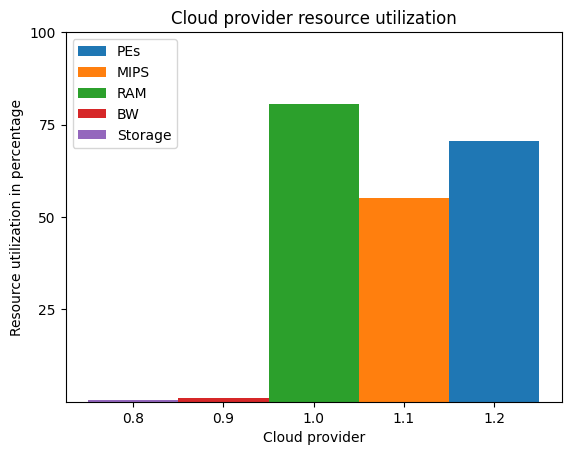

In [4]:
bar_width = 0.2
plt.bar(1 + bar_width, np.mean(datacenter_usedPEs)/np.mean(datacenter_totalPEs)*100, bar_width/2, label="PEs")
plt.bar(1 + bar_width/2, np.mean(datacenter_usedMIPS)/np.mean(datacenter_totalMIPS)*100, bar_width/2, label="MIPS")
plt.bar(1, np.mean(datacenter_usedRAM)/np.mean(datacenter_totalRAM)*100, bar_width/2, label="RAM")
plt.bar(1 - bar_width/2, np.mean(datacenter_usedBW)/np.mean(datacenter_totalBW)*100, bar_width/2, label="BW")
plt.bar(1 - bar_width, np.mean(datacenter_usedStorage)/np.mean(totalStorage)*100, bar_width/2, label="Storage")

plt.xlabel("Cloud provider")
plt.ylabel("Resource utilization in percentage")
plt.yticks([25,50,75,100])
plt.title("Cloud provider resource utilization")
plt.legend()
plt.show()

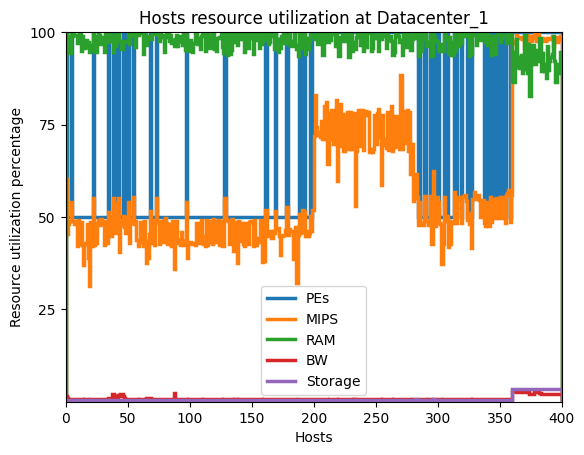

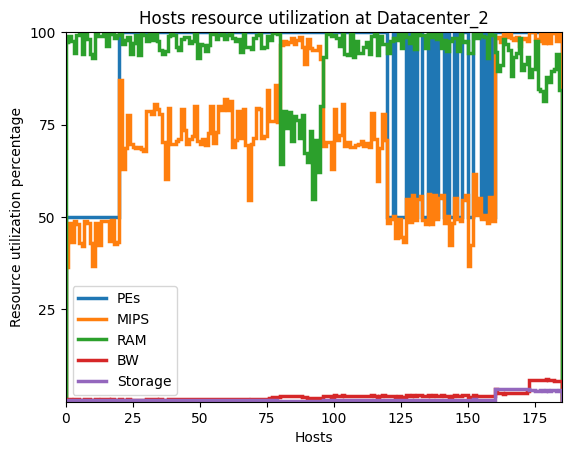

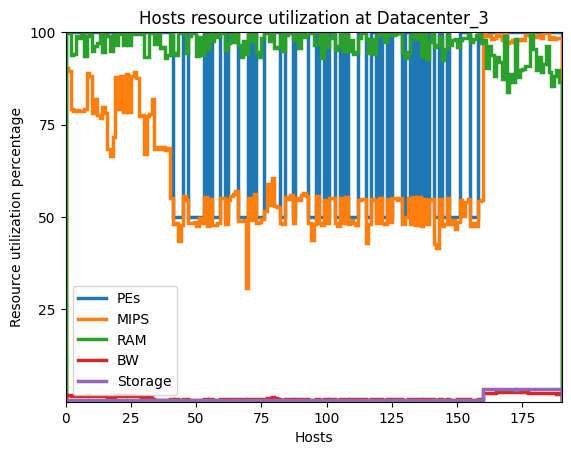

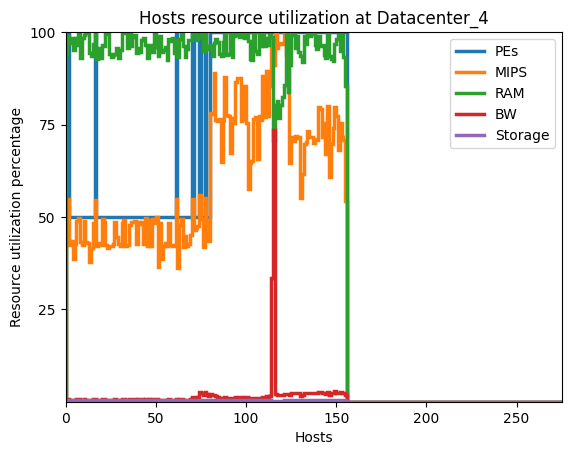

In [5]:
labels = np.unique(dataset['datacenter_name'])

for i in range(len(labels)):
    host_PEs = np.array([])
    host_availablePEs = np.array([])
    
    host_MIPS = np.array([])
    host_availableMIPS = np.array([])
    
    host_RAM = np.array([])
    host_availableRAM = np.array([])
    
    host_BW = np.array([])
    host_availableBW = np.array([])
    
    host_Storage = np.array([])
    host_availableStorage = np.array([])
    
    for index, sample in dataset[(dataset['datacenter_name'] == labels[i]) & (dataset['time'] == 300.01)].iterrows():
        host_PEs = np.append(host_PEs, sample['number_of_pes'])
        host_availablePEs = np.append(host_availablePEs, sample['available_pes'])
        
        host_MIPS = np.append(host_MIPS, sample['mips'])
        host_availableMIPS = np.append(host_availableMIPS, sample['available_mips'])
        
        host_RAM = np.append(host_RAM, sample['ram'])
        host_availableRAM = np.append(host_availableRAM, sample['available_ram'])
        
        host_BW = np.append(host_BW, sample['bw'])
        host_availableBW = np.append(host_availableBW, sample['available_bw'])
        
        host_Storage = np.append(host_Storage, sample['storage'])
        host_availableStorage = np.append(host_availableStorage, sample['available_storage'])
        
    fig, ax = plt.subplots()
    ax.stairs(np.divide(np.subtract(host_PEs, host_availablePEs), host_PEs)*100, linewidth=2.5, label="PEs")
    ax.stairs(np.divide(np.subtract(host_MIPS, host_availableMIPS), host_MIPS)*100, linewidth=2.5, label="MIPS")
    ax.stairs(np.divide(np.subtract(host_RAM, host_availableRAM), host_RAM)*100, linewidth=2.5, label="RAM")
    ax.stairs(np.divide(np.subtract(host_BW, host_availableBW), host_BW)*100, linewidth=2.5, label="BW")
    ax.stairs(np.divide(np.subtract(host_Storage, host_availableStorage), host_Storage)*100, linewidth=2.5, label="Storage")
    ax.set(xlim=(0, len(host_availablePEs)), ylim=(0,100), yticks=np.array([25,50,75,100])) #xticks=np.arange(1,len(host_availablePEs))
    plt.ylabel("Resource utilization percentage")
    plt.xlabel("Hosts")
    plt.title(f"Hosts resource utilization at {sample['datacenter_name']}")
    plt.legend()
    plt.show()

In [6]:
print(f"Out of the {np.sum(datacenter_totalPEs)} available CPUs {np.sum(datacenter_totalPEs) - np.sum(datacenter_availablePEs)} are used. (percent: {((np.sum(datacenter_totalPEs) - np.sum(datacenter_availablePEs))/np.sum(datacenter_totalPEs))*100}%)")
print(f"Out of the {np.sum(datacenter_totalMIPS)} available MIPS {np.sum(datacenter_totalMIPS) - np.sum(datacenter_availableMIPS)} are used. (percent: {((np.sum(datacenter_totalMIPS) - np.sum(datacenter_availableMIPS))/np.sum(datacenter_totalMIPS))*100}%)")
print(f"Out of the {np.sum(datacenter_totalRAM)} available RAM {np.sum(datacenter_totalRAM) - np.sum(datacenter_availableRAM)} are used. (percent: {((np.sum(datacenter_totalRAM) - np.sum(datacenter_availableRAM))/np.sum(datacenter_totalRAM))*100}%)")
print(f"Out of the {np.sum(datacenter_totalBW)} available bandwidth {np.sum(datacenter_totalBW) - np.sum(datacenter_availableBW)} are used. (percent: {((np.sum(datacenter_totalBW) - np.sum(datacenter_availableBW))/np.sum(datacenter_totalBW))*100}%)")
print(f"Out of the {np.sum(datacenter_totalStorage)} available Storage {np.sum(datacenter_totalStorage) - np.sum(datacenter_availableStorage)} are used. (percent: {((np.sum(datacenter_totalStorage) - np.sum(datacenter_availableStorage))/np.sum(datacenter_totalStorage))*100}%)")


Out of the 2360.0 available CPUs 1662.0 are used. (percent: 70.42372881355932%)
Out of the 5954400.0 available MIPS 3289525.4666677765 are used. (percent: 55.2452886381126%)
Out of the 5760000.0 available RAM 4633587.0 are used. (percent: 80.44421874999999%)
Out of the 10500000.0 available bandwidth 113862.0 are used. (percent: 1.0844%)
Out of the 153260000.0 available Storage 863400.0 are used. (percent: 0.5633563878376615%)


In [9]:
for index in range(len(datacenter_totalPEs)):
    print(f"---------- {labels[index]} ----------")
    print(f"Out of the {datacenter_totalPEs[index]} available CPUs {datacenter_totalPEs[index] - datacenter_availablePEs[index]} are used. (percent: {((datacenter_totalPEs[index] - datacenter_availablePEs[index])/datacenter_totalPEs[index])*100}%)")
    print(f"Out of the {datacenter_totalMIPS[index]} available MIPS {datacenter_totalMIPS[index] - datacenter_availableMIPS[index]} are used. (percent: {((datacenter_totalMIPS[index] - datacenter_availableMIPS[index])/datacenter_totalMIPS[index])*100}%)")
    print(f"Out of the {datacenter_totalRAM[index]} available RAM {datacenter_totalRAM[index] - datacenter_availableRAM[index]} are used. (percent: {((datacenter_totalRAM[index] - datacenter_availableRAM[index])/datacenter_totalRAM[index])*100}%)")
    print(f"Out of the {datacenter_totalBW[index]} available bandwidth {datacenter_totalBW[index] - datacenter_availableBW[index]} are used. (percent: {((datacenter_totalBW[index] - datacenter_availableBW[index])/datacenter_totalBW[index])*100}%)")
    print(f"Out of the {datacenter_totalStorage[index]} available Storage {datacenter_totalStorage[index] - datacenter_availableStorage[index]} are used. (percent: {((datacenter_totalStorage[index] - datacenter_availableStorage[index])/datacenter_totalStorage[index])*100}%)")


---------- Datacenter_1 ----------
Out of the 880.0 available CPUs 667.0 are used. (percent: 75.79545454545455%)
Out of the 2339200.0 available MIPS 1398612.1843490144 are used. (percent: 59.790192559379896%)
Out of the 2080000.0 available RAM 2000663.0 are used. (percent: 96.18572115384615%)
Out of the 4000000.0 available bandwidth 36094.0 are used. (percent: 0.90235%)
Out of the 59680000.0 available Storage 376700.0 are used. (percent: 0.6311997319034853%)
---------- Datacenter_2 ----------
Out of the 420.0 available CPUs 378.0 are used. (percent: 90.0%)
Out of the 964800.0 available MIPS 703104.5969366361 are used. (percent: 72.87568376208915%)
Out of the 1040000.0 available RAM 971574.0 are used. (percent: 93.42057692307692%)
Out of the 1850000.0 available bandwidth 27462.0 are used. (percent: 1.4844324324324325%)
Out of the 27040000.0 available Storage 177200.0 are used. (percent: 0.6553254437869822%)
---------- Datacenter_3 ----------
Out of the 440.0 available CPUs 379.0 are use

In [8]:
print(f"Host {np.argmin(host_availableBW)} has a bandwidth utilization above 1Gbits at {((host_Storage[np.argmin(host_availableBW)] - host_availableStorage[np.argmin(host_availableBW)]) / host_Storage[np.argmin(host_availableBW)]) * 100}")

Host 115 has a bandwidth utilization above 1Gbits at 0.25
